# Übung 8

**Gruppenname:**

*Name Ihrer Gruppe*

Gehen Sie wie folgt vor:

1. Bitte benennen Sie jetzt dieses Jupyter Notebook um (z.B. über `File -> Rename`):

   Namensschema: `Gruppenname-X`. Ersetzen Sie "X" mit der oben angegebenen Nummer der Übung.

   - Beispiel 1: Team REZA bearbeitet Übung 2. Das Notebook heißt: REZA-2.
   - Beispiel 2: Sie sind keinem Team zugeordnet (nicht empfehlenswert) und bearbeiten Übung 2: Ihr Notebook heißt: Nachname-2.


2. Tragen Sie Ihren Gruppennamen auch ganz oben bei "Name Ihrer Gruppe" ein.

3. Bearbeiten Sie dann dieses Notebook. Vergessen Sie dabei nicht, das Jupyter Notebook regelmäßig zu speichern (z.B. über `Strg + S` oder über `File -> Save and Checkpoint`).

### Hinweise
* Nutzen Sie für die folgenden Aufgaben **nur** die Mittel, die Ihnen Numpy und Matplotlib zur Verfügung stellt.

### In dieser Übung ...

... werden wir uns mit K-Means Clustering vertraut machen. Wir werden K-Means Clustern implementieren (Übung 8.1).

### 8.1 K-Means

In der Vorlesung haben Sie K-Means als eine klassische Clustering-Methode kennengelernt. Sie werden Ihr Wissen über den K-Means Algorithmus durch diese Übung vertiefen. Nutzen Sie für die Implementierung Befehle der Numpy-Bibliothek.

**Ihre Aufgaben**

(1) Schlagen Sie in den Vorlesungsfolien den K-Means Algorithmus nach.

I. Setup: Jeden Datenpunkt zufällig eine Ziffer/Klasse zuordnen
II. Iteration: Schwerpunkt jedes Clusters berechnen und punkte neu zuweisen -> solange bis sich nichts mehr ändert.

(2) Ich habe Ihnen synthetische Daten zur Übung bereitgestellt. Bitte führen Sie die unten stehende Code-Zelle aus. Sie erzeugt 100 Datenpunkte mit je zwei Features (Merkmalen, Array **X**), organisiert in drei Cluster. Die Clusterzugehörigkeiten sind im Vektor **y** kodiert.

In [35]:
import yaml

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

# generate data
X, y = make_blobs(n_samples=100, n_features=2, centers=3,
                random_state=1)

In [2]:
old_y = y

In [3]:
X.shape

(100, 2)

In [4]:
from logging import info,debug
import logging

logging.basicConfig(level=logging.INFO)

In [5]:
y

array([0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0])

(3) [Visualisieren Sie](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) die Daten in einem Scatterplot und färben Sie die Cluster gemäß ihrer Clusterzugehörigkeit ein.

In [6]:
def number_to_color(x : int):
    """Returns the color to a number/cluster"""
    if x == 0:
        return "red"
    elif x == 1:
        return "blue"
    elif x == 2: 
        return "magenta"
    else:
        raise ValueError(f"Unexpected value for x: {x}")

In [7]:
# creating the color array for matplotlib
colors = [number_to_color(i) for i in y]

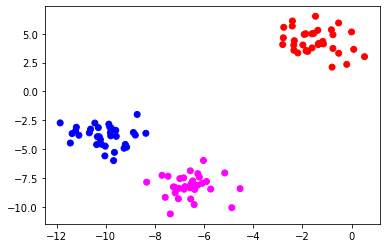

In [8]:
fig, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],c=colors)

(4) Die Anzahl der Cluster sei $K=3$. Implementieren Sie Schritt 1 des K-Means Algorithmus, also die zufällige Zuweisung von Datenpunkten zu den $K$ Clustern. [Dies hier](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) kann Ihnen dabei hilfreich sein.

In [9]:
# following the "new way" from the numpy documentation
rng = np.random.default_rng()
y = rng.integers(0,3,size=100)

(5) Visualisieren Sie in einem Scatterplot die Daten und färben Sie die Datenpunkte gemäß Ihrer aus Schritt (4) ermittelten zufälligen Clusterzugehörigkeit ein.

In [10]:
# creating the color array for matplotlib
colors = [number_to_color(i) for i in y]

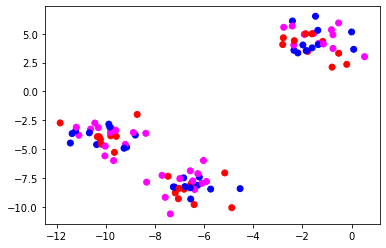

In [11]:
fig, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],c=colors)

(6) Implementieren Sie nun die Iterationsschritte 2a und 2b, also die Bestimmung der Clusterzentren (geometrische Schwerpunkte) sowie die Neuzuordnung der Datenpunkte zu demjenigen Cluster, zu dem die Entfernung zum Schwerpunkt des Clusters am kleinsten ist. Nutzen Sie dabei als Distanzmaß den euklidischen Abstand. Eventuell können Ihnen diese Funktionen dabei hilfreich sein: [np.argmin](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html), [np.unique](https://docs.scipy.org/doc/numpy/reference/generated/numpy.unique.html).
* Für diesen Schritt benötigen Sie vermutlich etwas länger Zeit. Nehmen Sie sich diese Zeit.
* Prüfen Sie nach Schritt 2b, ob die Zuordnung von Datenpunkten zu Clustern tatsächlich alle Cluster enthält. Falls etwa ein Cluster keine Datenpunkte mehr enthält, starten Sie die Prozedur von Schritt 1 an neu. Wir werden später auf die "Leere-Cluster-Problematik" eingehen.
* Es empfiehlt sich, Ihren Code - sobald er funktioniert - in eine Funktion namens `kmeans` zu schreiben, die die Daten $X$ sowie die Clusteranzahl $K$ entgegennimmt, und das Clusteringergebnis $y_\text{pred}$ ausgibt. Sie können dann im weiteren Verlauf dieser Übung einfach nur noch die Funktion `kmeans` aufrufen.

In [12]:
def kmeans(X,k):
    """executes the kmeans clustering algorithm
    
    Ensures that there are exactly k clusters by retrying if one happens
    to dissapear in the process
    
    Paramters:
    ----------
    X : np.ndarray
        The points to work on, must have shape (n,f) with n being the number
        of points and f the number of dimensions or features.
    k : int
        The number of classes
        
    Returns:
    --------
    np.ndarray
        The cluster assignment as an np.array of shape (n,) with integer 
        values between [0,k). 
    
    """
    # setting up rng
    rng = np.random.default_rng()
    
    # getting n to make code cleaner
    n = X.shape[0]
    
    # this while loop is to enable the "retrying" if a cluster disappears
    not_yet_suceeded = True
    while not_yet_suceeded: 
        # random inital assignement
        y = rng.integers(0,k,size=n)
        new_y = np.zeros((n,)) # there's a small likelyhood this is 
        # equal to the inital y, but I don't care
        
        while True: # while the iteration changes something
            new_y = k_means_iteration(X,y,k)
            if len(np.unique(new_y)) != k: # if a cluster dissapeared
                debug(f"dimension got lost: {new_y}")
                break # restart outer loop
            if (new_y == y).all(): # if iteration did not change anything
                # stop outer loop
                not_yet_suceeded = False 
                break
            # else
            y = new_y
    return new_y

# helper functions since we are good software engineers!
def k_means_iteration(X,y,k):
    """Makes an iteration of the k-means algorithm
    
    Paramters:
    ----------
    X : np.ndarray
        The points to work on, must have shape (n,f) with n being the number
        of points and f the number of dimensions or features.
    y : np.ndarray
        The class or cluster of each point from X, must be of shape (n,) and 
        only contain integer values in [0,k) 
    k : int
        The number of classes
        
    Returns:
    --------
    np.ndarray
        The new cluster assoziation, like y of shape (n,)
    
    """
    centroids_by_class = get_centroids_by_class(X,y,k)
    debug(f"centroids_by_class:{centroids_by_class}")
    
    # compute euclidian distance to each centroid
    # TODO: make this fancy without loop
    distance_to_centroid = np.zeros((X.shape[0],k))
    for i in range(X.shape[0]): # iterate through points
        for j in range(k): # iterate through centroids/classes
            point = X[i]
            centroid = centroids_by_class[j]
            distance_to_centroid[i][j] = np.linalg.norm(point-centroid)
    debug(f"distance to centroid: {distance_to_centroid}")
    new_y = np.argmin(distance_to_centroid,axis=1)
    return new_y

def get_centroids_by_class(X,y,k):
    """Computes the centroid of each of the k classes
    
    Paramters:
    ----------
    X : np.ndarray
        The points to work on, must have shape (n,f) with n being the number
        of points and f the number of dimensions or features.
    y : np.ndarray
        The class or cluster of each point from X, must be of shape (n,) and 
        only contain integer values in [0,k) 
    k : int
        The number of classes
        
    Returns:
    --------
    list of np.ndarrays
        List with k elements, each being an np.ndarray with shape (f,) - the k
        centroids.
    """
    # get centroids
    points_by_class = [X[y == i] for i in range(k)]
    # debug(f"points by class: {points_by_class}")
    return [np.average(points,axis=0) for points in points_by_class]
    

(7) Führen Sie nun mit Ihrer Implementierung K-Means auf den Daten aus ($K=3$). Visualisieren Sie die Daten in einem Scatterplot und färben Sie sie gemäß der durch K-Means ermittelten Clusterzugehörigkeiten ein. Vergleichen Sie Ihren Plot mit dem aus Schritt (5).

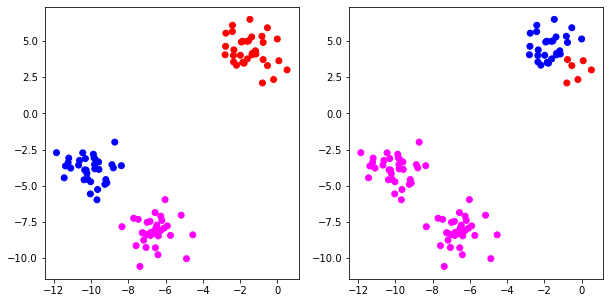

In [13]:

new_y = kmeans(X,3)
# creating the color arrays for matplotlib
new_colors = [number_to_color(i) for i in new_y]
old_colors = [number_to_color(i) for i in old_y]

# creating the plot
fig, ax = plt.subplots(ncols=2,figsize=(10,5))
ax[0].scatter(X[:,0],X[:,1],c=old_colors)
ax[1].scatter(X[:,0],X[:,1],c=new_colors)

Sie haben im vorherigen Schritt gesehen, dass Sie mithilfe von K-Means Cluster im Datensatz identifizieren können. Nun geht es darum, Ihre Implementierung abzusichern, sodass Sie leeren Clustern, die während der Iterationen entstehen können, umgehen kann.

(8) Implementieren Sie vor Schritt 2a (also zu Beginn Ihrer Iteration) ein Verfahren, das überprüft, ob es Cluster gibt, die keine Datenpunkte enthalten. In diesem Falle wählen Sie einen zufälligen Datenpunkt aus und weisen ihn dem leeren Cluster zu. Dieser [Befehl](https://www.w3schools.com/python/ref_set_difference.asp) könnte Ihnen bei diesem Unterfangen hilfreich sein.

* Wie kann es dazu kommen, dass wir während der Iteration leere Cluster erhalten? Schauen Sie sich zur Erklärung das [hier](http://user.ceng.metu.edu.tr/~tcan/ceng465_f1314/Schedule/KMeansEmpty.html) verlinkte Beispiel an.
* Wenn Sie Schritt (8) fertig bearbeitet haben, entfernen Sie einfach den Neustart-Mechanismus, den Sie in Schritt (6) implementiert hatten. Sie brauchen diesen nicht mehr.

In [14]:
# experimenting with the set function "difference"
print({1,2,3}.difference({1,2}))
print(set(np.array([1,2])).difference({1})) # conversion to set necessary
print(set(np.array([1,1,1,1])))
print(bool({}))

{3}
{2}
{1}
False


In [15]:
# new implementation of kmeans
def kmeans(X,k):
    """executes the kmeans clustering algorithm
    
    Ensures that there are exactly k clusters by being smart instead of 
    brute force retrying. (So this is kinda the implementation version 1.1)
    
    Parameters:
    ----------
    X : np.ndarray
        The points to work on, must have shape (n,f) with n being the number
        of points and f the number of dimensions or features.
    k : int
        The number of classes
        
    Returns:
    --------
    np.ndarray
        The cluster assignment as an np.array of shape (n,) with integer 
        values between [0,k). 
    
    """
    # setting up rng
    rng = np.random.default_rng()
    
    # getting n to make code cleaner
    n = X.shape[0]

    # random inital assignement
    y = rng.integers(0,k,size=n)
    
    info(f"initial y:{y}")
    
    old_y = None
    
    cluster_set = set(np.arange(k))
    info(f"cluster_set:{cluster_set}")

    while True: # while the iteration changes something
        
        missing_clusters = cluster_set.difference(set(y))
        info(f"missing clusters:{missing_clusters}")
        if missing_clusters: # if the set is not empty
            info("clusters are missing")
            for missing in missing_clusters:
                info(f"missing cluster: {missing}")
                y[rng.integers(0,n)]=missing
            continue # restart while loop to run check again
            # and insure we did not whipe out another cluster
        old_y = y
        y = k_means_iteration(X,y,k)
        if (old_y == y).all(): # if iteration did not change anything
            break
        # else
        info(f"y:{y}")
        info(f"old_y:{old_y}")
        
        # import pdb; pdb.set_trace()
        
    return y

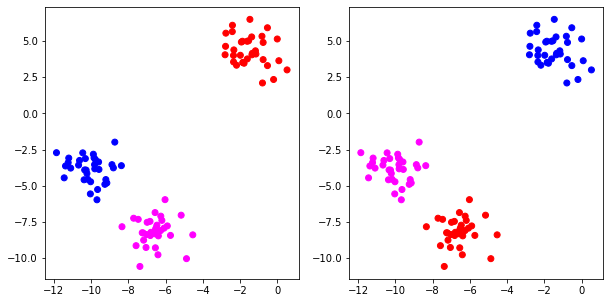

In [16]:
# testing new kmeans
logging.getLogger().setLevel(logging.WARNING)
new_y = kmeans(X,3) 
# creating the color arrays for matplotlib
new_colors = [number_to_color(i) for i in new_y]
old_colors = [number_to_color(i) for i in old_y]

# creating the plot
fig, ax = plt.subplots(ncols=2,figsize=(10,5))
ax[0].scatter(X[:,0],X[:,1],c=old_colors)
ax[1].scatter(X[:,0],X[:,1],c=new_colors)

(9) Ermitteln Sie Cluster für $K=2, 3, 4, 5$ und visualisieren Sie sie (wie in Schritt 7) in Scatterplots. Was fällt Ihnen auf? (1-3 Sätze)

In [17]:
# new number to colors function
def number_to_more_color(x : int):
    """Returns the color to a number/cluster"""
    if x == 0:
        return "red"
    elif x == 1:
        return "blue"
    elif x == 2: 
        return "magenta"
    elif x == 3:
        return "black"
    elif x == 4:
        return "purple"
    else:
        raise ValueError(f"Unexpected value for x: {x}")

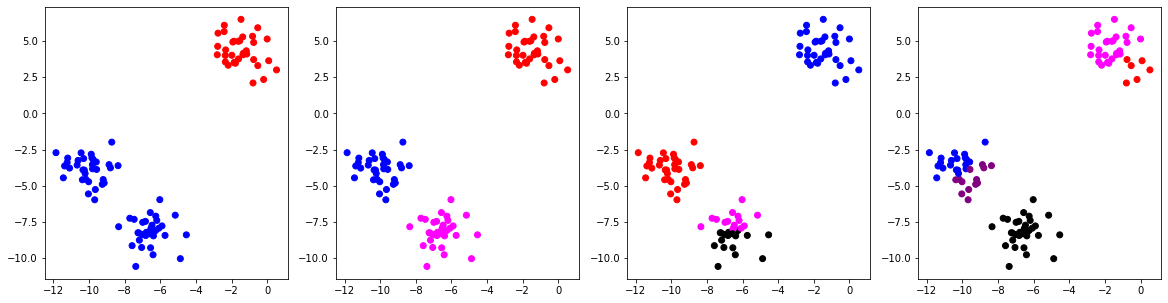

In [18]:
clusterings = [kmeans(X,i) for i in [2,3,4,5]]

fig, ax = plt.subplots(ncols=4,figsize=(20,5))
for axes,clustering in zip(ax,clusterings):
    colors = [number_to_more_color(i) for i in clustering]
    axes.scatter(X[:,0],X[:,1],c=colors)

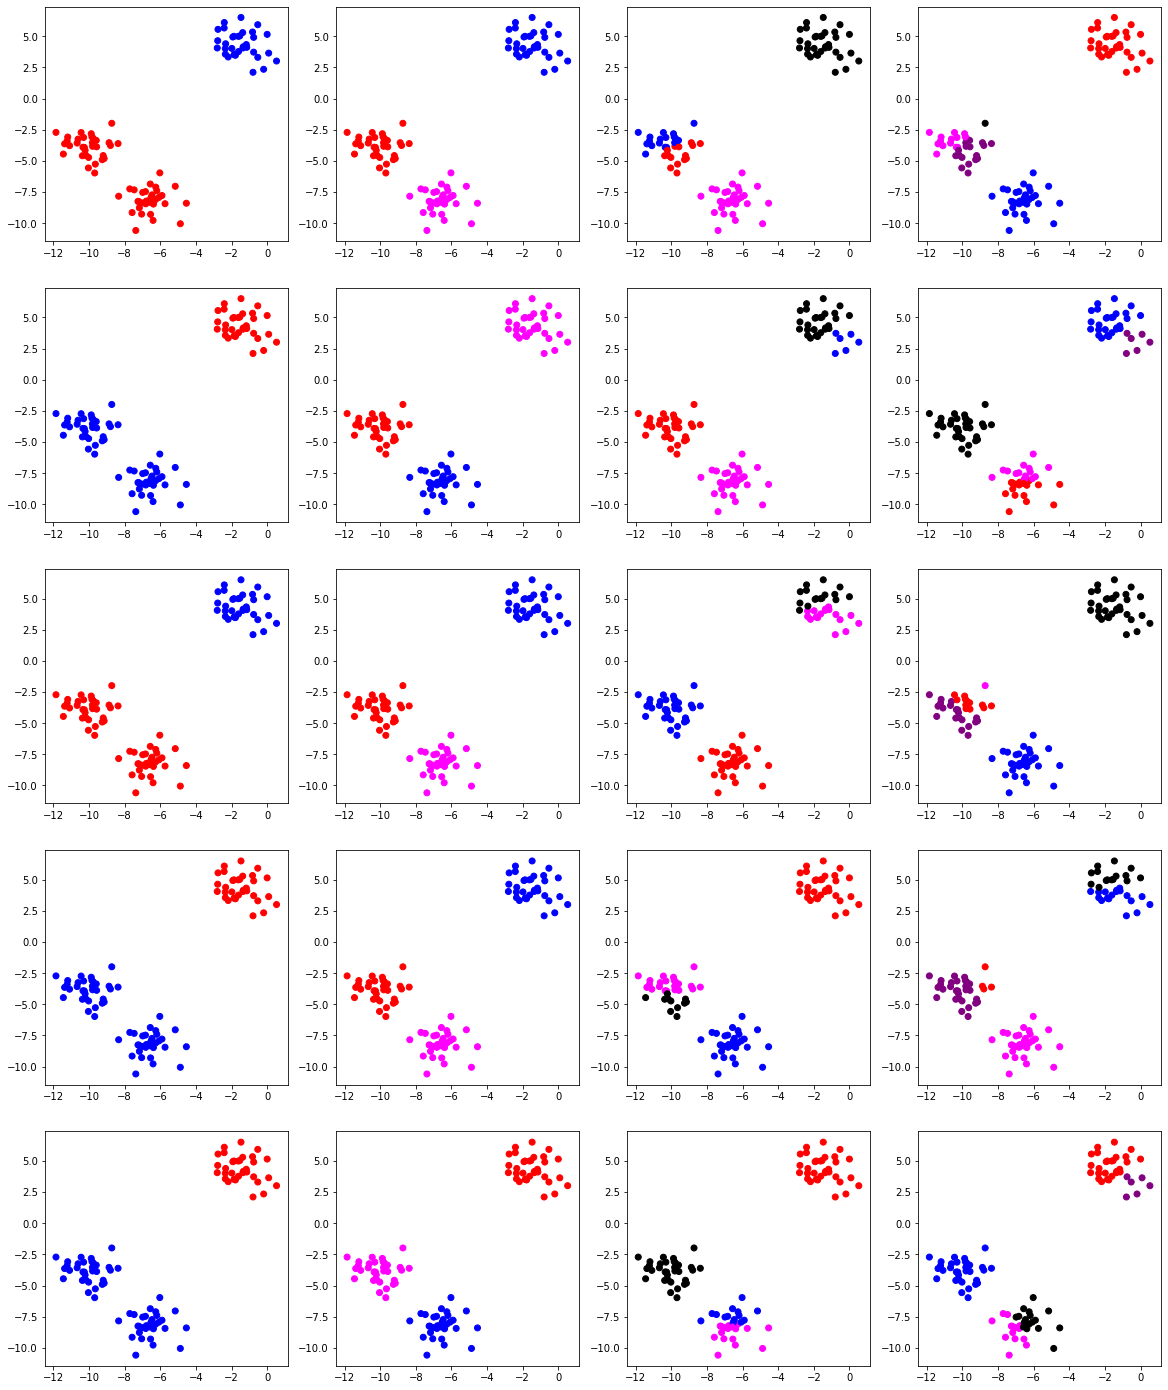

In [19]:
# because I can: the same as above but multiple times-> multiple rows

number_rows = 5



fig, ax = plt.subplots(ncols=4,nrows=number_rows,figsize=(20,5*number_rows))
for j in range(number_rows):
    clusterings = [kmeans(X,i) for i in [2,3,4,5]]
    
    for axes,clustering in zip(ax[j],clusterings):
        colors = [number_to_more_color(i) for i in clustering]
        axes.scatter(X[:,0],X[:,1],c=colors)

**Antwort:** Je mehr Cluster, desto mehr Möglichkeiten gibt es. So richtig Sinn machen aber nur k=2 und k=3, wobei man bei letzterem aufpassen muss dass man nicht ausversehen eines des lokalen minima mit aufgeteiltem cluster rechts oben erwischt.

(10) Ermitteln Sie für den unten erzeugten Datensatz mithilfe von K-Means $K=2$ Cluster und visualisieren Sie das Clusterergebnis (vergessen Sie nicht, die Punkte gemäß ihrer Clusterzugehörigkeit einzufärben).

Text(0.5, 1.0, 'my y')

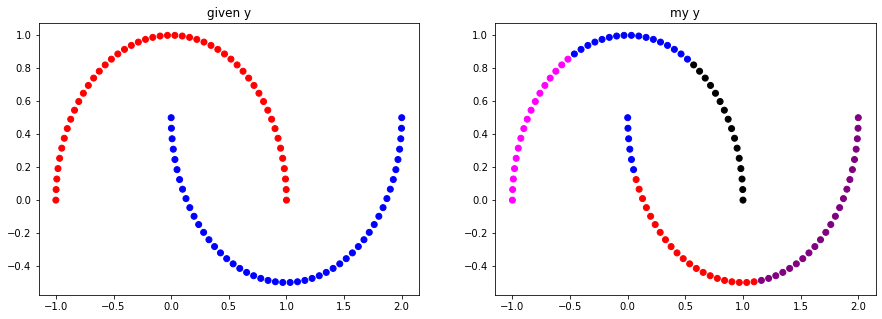

In [20]:
from sklearn.datasets import make_moons
[X2, y2] = make_moons(random_state=1)

# I am too tired for good variable names by now...
y_mine = kmeans(X2,5)
colors_mine = [number_to_more_color(i) for i in y_mine]

colors2 = [number_to_color(i) for i in y2]

fig, ax = plt.subplots(ncols=2,figsize=(15,5))
ax[0].scatter(X2[:,0],X2[:,1],c=colors2)
ax[0].set_title("given y")
ax[1].scatter(X2[:,0],X2[:,1],c=colors_mine)
ax[1].set_title("my y")

In [21]:
X2.shape,y2.shape

((100, 2), (100,))

In [22]:
y2

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

(11) Erklären Sie, warum Sie im vorherigen Schritt nicht die Cluster erhalten, wie Sie sie für die Daten erwarten würden. Mit welchem anderen Clusteransatz könnten Sie eventuell die korrekten Cluster ermitteln? (3-6 Sätze).

**Antwort** Die Punkte der "Cluster" liegen nicht paarweise dicht beieinander, sondern bilden nur eine zusammenhängende Linie. Dazu kommt dass die Schwerpunkte der eigentlichen Cluster "außerhalb" liegen, hier sogar vermutlich auf Punkten des jeweils anderen Cluster.

Hierarchichal Clustern (vermutlich mit average link) sollte das besser hinbekommen, wobei man da wohl mit den varianten herumprobieren muss.

In [23]:
# which I'll do now! (evil laughter or sth)
from sklearn.cluster import AgglomerativeClustering

In [24]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X2)

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

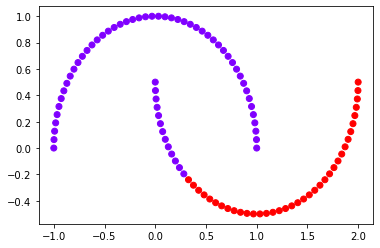

In [25]:
plt.scatter(X2[:,0],X2[:,1], c=cluster.labels_, cmap='rainbow')
# ... that does not look so good

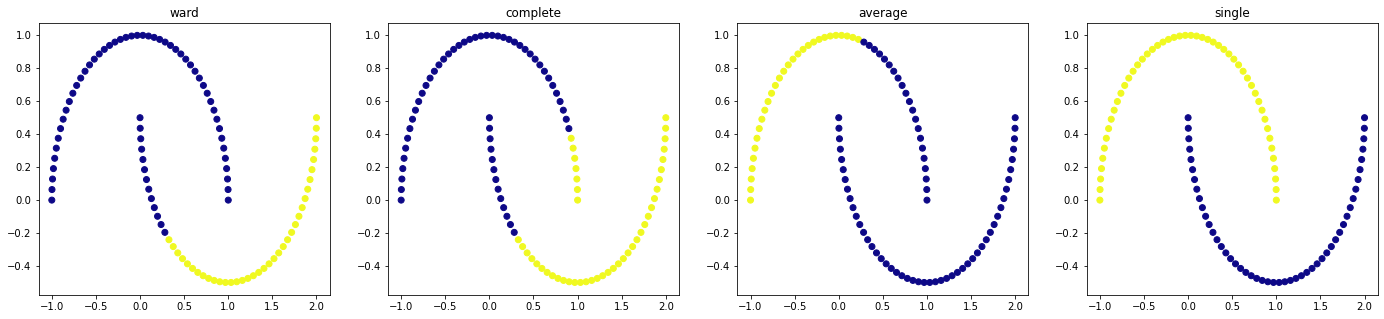

In [26]:
# let's try through the different linkage criterions!
linkage_criterions = ["ward","complete","average","single"]
clusters = [AgglomerativeClustering(linkage=i) for i in linkage_criterions]
for cluster in clusters:
    cluster.fit_predict(X2)
fig, ax = plt.subplots(ncols=4,figsize=(24,5))
for axes,cluster in zip(ax,clusters):
    axes.scatter(X2[:,0],X2[:,1], c=cluster.labels_, cmap='plasma')
    axes.set_title(cluster.linkage)
# -> only single looks good. Guess my answer was not too right^^'

(12) \[Optional\] Schlagen Sie in den Vorlesungsfolien nach, wie die summierte Intra-Cluster-Variation $\sum_{k=1}^K W(C_k)$ definiert ist. Implementieren Sie eine Funktion `icv`, die die Daten $X$ sowie die Clusterzugehörigkeit $y$ entgegennimmt und Ihnen die summierte Intra-Cluster-Variation zurückgibt.

(13) \[Optional\] Sie wissen aus der Vorlesung, dass K-Means Clustering-Ergebnisse liefern kann, die lokalen Minima in der Intra-Cluster-Variation entsprechen. Das erzielte Clustering hängt von der zufälligen Initialisierung der Clusterzugehörigkeiten in Schritt 1 des Algorithmus ab. Wir wollen nun erreichen, dass Ihre Implementierung von kmeans mehrfache ($n=20$) Clustering-Versuche mit unterschiedlichen zufälligen initialen Clusterzugehörigkeiten unternimmt und das Clustering mit der niedrigsten Intra-Cluster-Variation zurückliefert. Ändern Sie dementsprechend Ihre Funktion ab und implementieren Sie diese Funktionalität.

(14) \[Optional\] Bestimmen Sie mit Ihrer Funktion `icv` aus Schritt (12) die Intra-Cluster-Variation für $K=1, \ldots 8$ und tragen Sie diese Größe gegen $K$ in einem Plot auf.

(15) \[Optional\] Die "korrekte" Anzahl an Clustern (sofern es sie überhaupt gibt) ist notorisch schwierig zu bestimmen und Methoden, diese zu bestimmen, ist aktueller Forschungsgegenstand. Ein pragmatischer Ansatz ist es, sich die Intra-Cluster-Variation (ICV) als Funktion der Clusteranzahl $K$ zu plotten und das $K$ auszuwählen, zu dem die ICV gerade stark abgesunken ist. Betrachten Sie dazu Ihren Plot aus Schritt (13): Gibt es ein $K$, ab der die summierte Intra-Cluster-Variation stark sinkt? Geben Sie diesen Wert für $K$ an. Ist dieser Wert Ihrer Meinung nach sinnvoll?

Damit darf ich Ihnen gratulieren. Sie haben das K-Means-Clusteringverfahren intensiv durchdrungen. K-Means wird Ihnen in Data Science und Machine Learning Projekten oft begegnen.  

### 8.2 Bildkompression (mittels K-Means)

In dieser Übung werden Sie lernen, wie Sie mithilfe von K-Means ein einfaches Verfahren etablieren können, um Bilder zu komprimieren. 

**Das Verfahren:**

1. Sie starten mit einem Foto in 16 Millionen Farben (24 Bit). Die Farbe jedes Pixels wird durch einen Rot-, Grün- und Blauanteil kodiert (jeweils 8 Bit) und besteht daher aus einem Featurevektor der Länge 3.
2. Mithilfe von K-Means finden Sie in diesen Featurevektoren 16 Cluster und ihre 16 Clusterzentren.
3. Die Bildinformation lässt sich nun mithilfe der 16 Cluster sowie ihrer Clusterzentren darstellen. Für die Kodierung der Clusteridentität reichen 4 Bits ($2^4=16$ Cluster). Die assoziierten 16 verschiedenen Vektoren der Clusterzentren werden ebenfalls gespeichert.


**Ihre Daten**

- Foto: [https://data.bialonski.de/ds/eichhorn.png](https://data.bialonski.de/ds/eichhorn.png)

**Ihre Aufgaben**



(1) [Importieren](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html) Sie die Daten in das Array `im`. Welche Dimensionen hat das Array? In welchen Dimensionen wird was kodiert?

In [27]:
oak_horn = plt.imread("./eichhorn.png")
im = oak_horn
oak_horn.shape

(128, 128, 3)

(2) [Visualisieren](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) Sie die Daten im Array `im`.

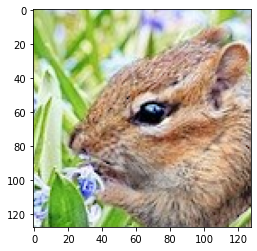

In [28]:
plt.imshow(im)

(3) Transformieren Sie das Array `im` in ein neues Array `X` mit neuem *Shape*, sodass dieses Array nur noch 2 Dimensionen aufweist: In den Zeilen stehen die Datenpunkte (Pixel) und in den Spalten die Farbkodierung.

In [29]:
im[0][0]

array([0.7058824 , 0.7921569 , 0.46666667], dtype=float32)

In [30]:
X = im.reshape((128*128,3)) #...looks good 
X

array([[0.7058824 , 0.7921569 , 0.46666667],
       [0.6313726 , 0.7137255 , 0.40392157],
       [0.6862745 , 0.78039217, 0.4745098 ],
       ...,
       [0.7019608 , 0.69803923, 0.5764706 ],
       [0.5568628 , 0.52156866, 0.41960785],
       [0.72156864, 0.6509804 , 0.57254905]], dtype=float32)

(4) Wenden Sie Ihren K-Means Algorithmus aus Übung 8.1 an, um 16 Cluster im Array `X` zu finden. Geben Sie außerdem auch die assoziierten Clusterzentren zurück.

* **Wichtig:** Wenn Sie Schwierigkeiten mit Ihrer Implementierung von K-Means haben, dann können Sie auch die Implementierung von [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) benutzen.

In [31]:
# new implementation of kmeans
def kmeans(X,k):
    """executes the kmeans clustering algorithm
    
    1.1 but with centroids returned as well
    
    Parameters:
    ----------
    X : np.ndarray
        The points to work on, must have shape (n,f) with n being the number
        of points and f the number of dimensions or features.
    k : int
        The number of classes
        
    Returns:
    --------
    (np.ndarray,np.ndarray)
        First cluster assignment as an np.array of shape (n,) with integer 
        values between [0,k). Second the centroids for each cluster.  
    
    """
    # setting up rng
    rng = np.random.default_rng()
    
    # getting n to make code cleaner
    n = X.shape[0]

    # random inital assignement
    y = rng.integers(0,k,size=n)
    
    info(f"initial y:{y}")
    
    old_y = None
    
    cluster_set = set(np.arange(k))
    info(f"cluster_set:{cluster_set}")

    while True: # while the iteration changes something
        
        missing_clusters = cluster_set.difference(set(y))
        info(f"missing clusters:{missing_clusters}")
        if missing_clusters: # if the set is not empty
            info("clusters are missing")
            for missing in missing_clusters:
                info(f"missing cluster: {missing}")
                y[rng.integers(0,n)]=missing
            continue # restart while loop to run check again
            # and insure we did not whipe out another cluster
        old_y = y
        y,centroids = k_means_iteration(X,y,k)
        if (old_y == y).all(): # if iteration did not change anything
            break
        # else
        info(f"y:{y}")
        info(f"old_y:{old_y}")
        
        # import pdb; pdb.set_trace()
        
    return y,centroids

# helper functions since we are good software engineers!
def k_means_iteration(X,y,k):
    """Makes an iteration of the k-means algorithm
    
    Paramters:
    ----------
    X : np.ndarray
        The points to work on, must have shape (n,f) with n being the number
        of points and f the number of dimensions or features.
    y : np.ndarray
        The class or cluster of each point from X, must be of shape (n,) and 
        only contain integer values in [0,k) 
    k : int
        The number of classes
        
    Returns:
    --------
    (np.ndarray,np.ndarray)
        First the new cluster assoziation, like y of shape (n,). Second the corresponding centroids.
    
    """
    centroids_by_class = get_centroids_by_class(X,y,k)
    debug(f"centroids_by_class:{centroids_by_class}")
    
    # compute euclidian distance to each centroid
    # TODO: make this fancy without loop
    distance_to_centroid = np.zeros((X.shape[0],k))
    for i in range(X.shape[0]): # iterate through points
        for j in range(k): # iterate through centroids/classes
            point = X[i]
            centroid = centroids_by_class[j]
            distance_to_centroid[i][j] = np.linalg.norm(point-centroid)
    debug(f"distance to centroid: {distance_to_centroid}")
    new_y = np.argmin(distance_to_centroid,axis=1)
    return new_y, centroids_by_class
    

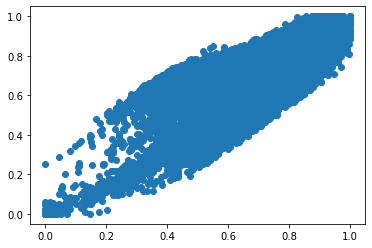

In [32]:
plt.scatter(X[:,0],X[:,1])

In [40]:
# getting the results, since the function takes a few minutes
with open("./a82cache.yaml","r") as stream:
    cache = yaml.safe_load(stream)
    
centroids = np.array(cache["centroids"])
y = np.array(cache["y"])
    
# y,centroids = kmeans(X,16)

Text(0.5, 1.0, 'green and blue')

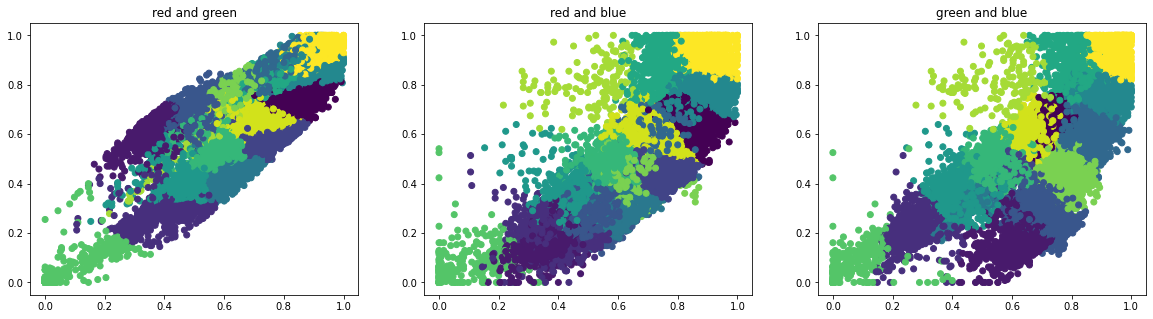

In [43]:
fig,ax = plt.subplots(ncols=3,figsize=(20,5))
ax[0].scatter(X[:,0],X[:,1],c=y) 
ax[0].set_title("red and green")
ax[1].scatter(X[:,0],X[:,2],c=y) 
ax[1].set_title("red and blue")
ax[2].scatter(X[:,1],X[:,2],c=y) 
ax[2].set_title("green and blue")
# ...that does not look terrible!

In [44]:
# dumping the data since I don't want to compute it twice!
to_dump = {
    "centroids":[list(map(float,list(centroid))) for centroid in centroids],
    "y":list(map(int,list(y))) # convert to normal list with normal ints
}
# to_dump

In [100]:
with open("./a82cache.yaml","w") as stream:
    yaml.dump(to_dump,stream,default_flow_style=True)

(5) Wir erstellen nun das Foto in seiner komprimierten Form, um es in einem späteren Schritt visualisieren zu können. Dazu müssen wir ein Array erstellen, wo jedes Pixel nicht mehr durch seinen ursprünglichen Rot-, Grün-, Blau-Vektor dargestellt wird, sondern durch den assoziierten Clusterzentrumsvektor. Jedes Pixel wurde über K-Means einem von 16 Clustern und damit auch einem von 16 Clusterzentrumsvektoren zugeordnet.

* Erstellen Sie ein Array `Z` mit denselben Dimensionen wie `X`, wo Sie allerdings die Features (die Farbkodierung) durch die jeweiligen Clusterzentrumsvektoren ersetzt haben.

In [47]:
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    Z[i] = centroids[y[i]]
Z

array([[0.67928827, 0.77994519, 0.42789841],
       [0.67928827, 0.77994519, 0.42789841],
       [0.67928827, 0.77994519, 0.42789841],
       ...,
       [0.73739874, 0.65050119, 0.58464116],
       [0.59510666, 0.52754849, 0.47725752],
       [0.73739874, 0.65050119, 0.58464116]])

(6) Geben Sie dem Array `Z` wieder die Form (Shape), die dem ursprünglichen Array `X` entspricht und visualisieren Sie dieses Array als Bild (siehe Schritt (2)).

In [49]:
imz = Z.reshape((128,128,3))

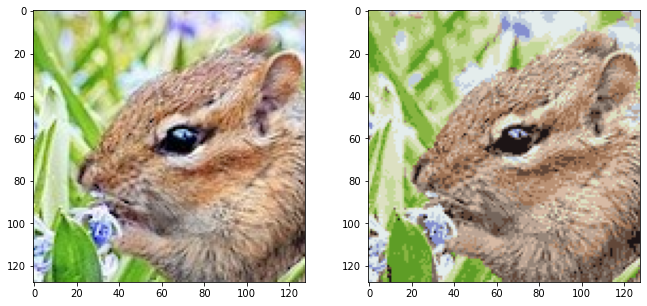

In [51]:
fig, ax = plt.subplots(ncols=2,figsize=(11,5))
ax[0].imshow(im)
ax[1].imshow(imz)

(7) Vergleichen Sie die Bilder aus Schritt (2) und Schritt (6): Sehen Sie große Qualitätsunterschiede?

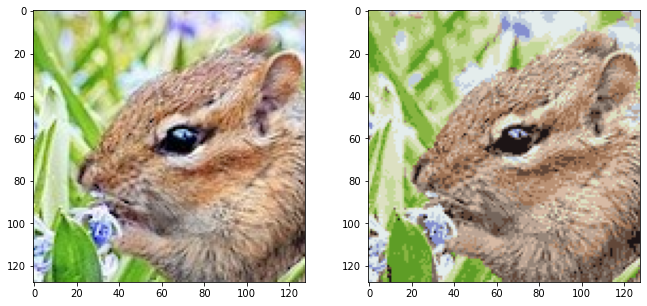

In [51]:
fig, ax = plt.subplots(ncols=2,figsize=(11,5))
ax[0].imshow(im)
ax[1].imshow(imz)
# -> man sieht einen Unterschied, langsame Farbübergänge sind nun häufig ein Fleck.

(8) \[Optional\] Wie viele Bytes benötigen Sie zum Speichern des ursprünglichen Bildes? Wie viele Bytes benötigen Sie, wenn Sie das Foto komprimiert mit K-Means abspeichern? Berechnen Sie die zu erwartenden Werte und geben Sie sie an.

In [53]:
centroids.size*8 + y.size # u8 reicht hier
# -> 16kB

16768

In [55]:
X.size*8
# -> 390kB

393216

### 8.3 Lehrevaluation

Bitte nehmen Sie an der Evaluation dieser Veranstaltung teil.

* Bitte schreiben Sie keine Kommentare in dieses Jupyter Notebook. Die Evaluation erfolgt über den üblichen Weg und Sie haben dazu bereits eine Einladung erhalten.

**Hintergrund**

Ihre (anonymen) Rückmeldungen in Lehrevaluationen helfen mir und meinen Kolleginnen und Kollegen dabei, ein Bild darüber zu erhalten, wie die Veranstaltungen im Rahmen der Corona-Pandemie gelaufen sind, was gut funktioniert hat und was noch verbessert werden kann.

Wichtig zu wissen: Ihre Rückmeldungen gehören zu den wichtigsten Datensätzen, mit dem innerhalb der Professorenschaft über die Qualität und Ausrichtung der Lehre diskutiert wird und mit dem auch über Konzepte argumentiert wird. Durch Ihre Rückmeldungen üben Sie aktiv Einfluss auf diese Diskussionen aus.

### 8.3 Lehrevaluation

Bitte nehmen Sie an der Evaluation dieser Veranstaltung teil.

* Bitte schreiben Sie keine Kommentare in dieses Jupyter Notebook. Die Evaluation erfolgt über den üblichen Weg und Sie haben dazu bereits eine Einladung erhalten.

**Hintergrund**

Ihre (anonymen) Rückmeldungen in Lehrevaluationen helfen mir und meinen Kolleginnen und Kollegen dabei, ein Bild darüber zu erhalten, wie die Veranstaltungen im Rahmen der Corona-Pandemie gelaufen sind, was gut funktioniert hat und was noch verbessert werden kann.

Wichtig zu wissen: Ihre Rückmeldungen gehören zu den wichtigsten Datensätzen, mit dem innerhalb der Professorenschaft über die Qualität und Ausrichtung der Lehre diskutiert wird und mit dem auch über Konzepte argumentiert wird. Durch Ihre Rückmeldungen üben Sie aktiv Einfluss auf diese Diskussionen aus.